In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [16]:
alpha=0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t_0 = 0
t_f = 25

In [110]:
def dsdt(t, s):
    return -alpha * s

soln = solve_ivp(dsdt, (t_0, t_f), [S0], dense_output=True)

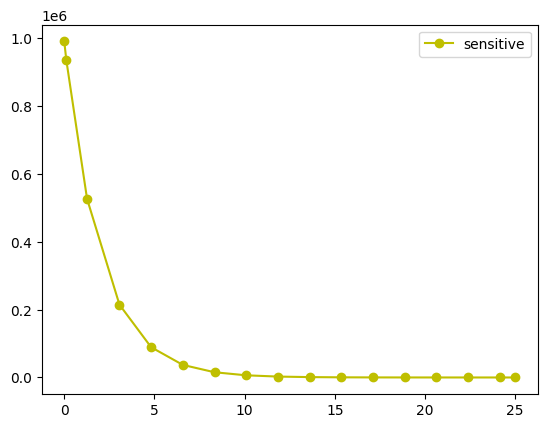

In [112]:
t, y = soln.t, soln.y[0]
plt.plot(t, y, '-o', color='y', label='sensitive')
plt.legend()
plt.show()

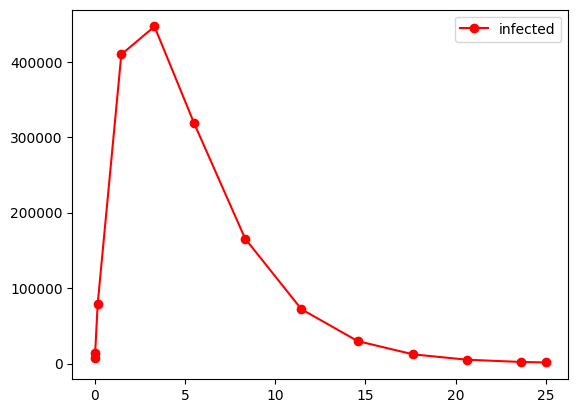

In [106]:
def didt(t, i):
    return alpha * soln.sol(t) - beta * i

sol_3 = solve_ivp(didt, (t_0, t_f), [I0], dense_output=True)
t3, y3 = sol_3.t, sol_3.y[0]
plt.plot(t3, y3, '-o', color='r', label='infected')
plt.legend()
plt.show()


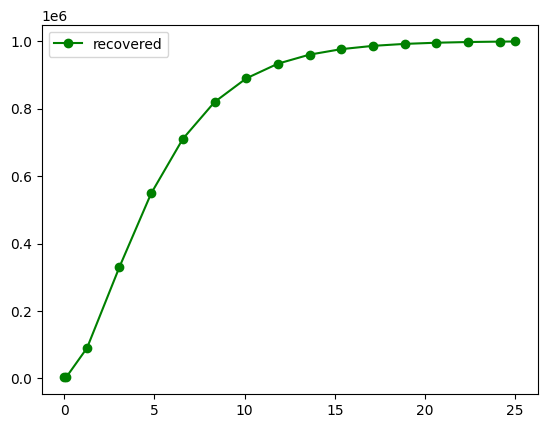

In [109]:
St = list(soln.sol(t))
It = list(sol_3.sol(t))
Rt = [N - sum(d) for d in zip(St, It)]

f = scipy.interpolate.interp1d(soln.t, Rt, kind="cubic")
plt.plot(list(soln.t), f(soln.t)[0], "-o",  color='g', label='recovered')
plt.legend()
plt.show()

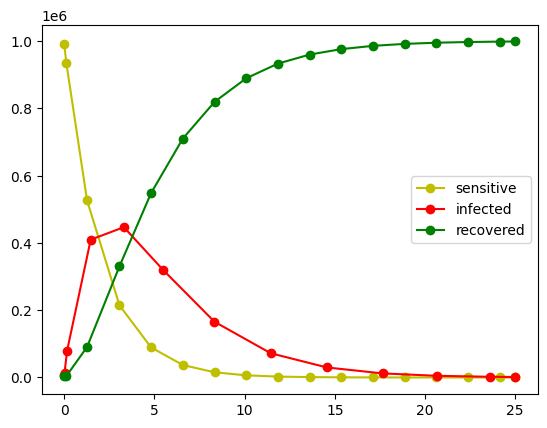

In [105]:
plt.plot(t, y, '-o', color='y', label='sensitive')
plt.plot(t3, y3, '-o', color='r', label='infected')
plt.plot(list(soln.t), f(soln.t)[0], "-o",  color='g', label='recovered')
plt.legend()
plt.show()